In [95]:
import pandas as pd
import os

In [96]:
dir = '../part2/'
data_basic_path = '../year/'
years = os.listdir(data_basic_path)

In [97]:
df = pd.DataFrame()

for year in years:
    print(year + ' Concating Please wait'+ ' . . . .'  )
    data = pd.read_csv(data_basic_path +  year + '/' + 'eOutcome.csv', usecols=['eRecordT01','eOutcomeT01']) #eDisposition;eDisposition.T10
    data["year"] = year
    data = data[['year','eRecordT01','eOutcomeT01']]

    # data = pd.read_csv(file, low_memory=False)
    df = pd.concat([df, data], axis=0)

concat_path_file = dir + "/{}_concat.csv".format('eOutcome')
df.to_csv(concat_path_file, index=False)
print('Success')

2011 Concating Please wait . . . .
2012 Concating Please wait . . . .
2013 Concating Please wait . . . .
2014 Concating Please wait . . . .
2015 Concating Please wait . . . .
2016 Concating Please wait . . . .
2017 Concating Please wait . . . .
2018 Concating Please wait . . . .
2019 Concating Please wait . . . .
2020 Concating Please wait . . . .
2021 Concating Please wait . . . .
2022 Concating Please wait . . . .
Success


In [98]:
df = pd.DataFrame()

for year in years:
    print(year + ' Concating Please wait'+ ' . . . .'  )
    data = pd.read_csv(data_basic_path +  year + '/' + 'eDisposition.csv', usecols=['eRecordT01','eDispositionT09']) #eDisposition;eDispositionT09
    data["year"] = year
    data = data[['year','eRecordT01','eDispositionT09']]

    # data = pd.read_csv(file, low_memory=False)
    df = pd.concat([df, data], axis=0)

concat_path_file = dir + "/{}_concat.csv".format('eDisposition')
df.to_csv(concat_path_file, index=False)
print('Success')

2011 Concating Please wait . . . .
2012 Concating Please wait . . . .
2013 Concating Please wait . . . .
2014 Concating Please wait . . . .
2015 Concating Please wait . . . .
2016 Concating Please wait . . . .
2017 Concating Please wait . . . .
2018 Concating Please wait . . . .
2019 Concating Please wait . . . .
2020 Concating Please wait . . . .
2021 Concating Please wait . . . .
2022 Concating Please wait . . . .
Success


In [99]:
from collections import Counter
triage_df1 = pd.read_csv('../part2/eOutcome_concat.csv')
triage_df1.head(5)

,year,eRecordT01,eOutcomeT01
0,2011,2011010110100410000334,7701003
1,2011,2011010110100410000335,7701003
2,2011,2011010110100410000336,7701003
3,2011,2011010110100410000337,7701003
4,2011,2011010110100410000338,7701003


In [100]:
from collections import Counter
triage_df2 = pd.read_csv('../part2/eDisposition_concat.csv')
triage_df2.head(5)

,year,eRecordT01,eDispositionT09
0,2011,2011010110100410000334,7701003
1,2011,2011010110100410000335,7701003
2,2011,2011010110100410000336,7701003
3,2011,2011010110100410000337,7701003
4,2011,2011010110100410000338,7701003


In [101]:
def count(dataFram,colname):
    class_Counter = Counter(dataFram[colname])
    return class_Counter

In [102]:
def triage1_sum(class_Counter):
    T1, T2, T3, T4, T5, other_01, other_03 = class_Counter[131001], class_Counter[131002], class_Counter[131003], class_Counter[131004], class_Counter[131005], class_Counter[7701001], class_Counter[7701003]

    type_sum = [T1, T2, T3, T4, T5, other_01, other_03]
    return type_sum

In [103]:
def triage2_sum(class_Counter):
    T1, T2, other_01, other_03 = class_Counter[129001], class_Counter[129002], class_Counter[7701001], class_Counter[7701003]

    type_sum = [T1, T2, other_01, other_03]
    return type_sum

In [104]:
##### 區間建立
triage_type1 = ['T1', 'T2', 'T3', 'T4', 'T5', 'other_01', 'other_03']
triage_type2 = ['T1', 'T2', 'other_01', 'other_03']
year_type_sum1 = []
year_type_sum2 = []

In [105]:
for year in years:
    mask  = triage_df1['year'] == int(year)
    class_Counter = count(triage_df1[mask],'eOutcomeT01')
    print(class_Counter)
    type_sum = triage1_sum(class_Counter)
    year_type_sum1.append(type_sum)

print(year_type_sum1)


Counter({7701003: 125860})
Counter({7701003: 123902})
Counter({7701003: 126246})
Counter({7701003: 134615})
Counter({7701003: 136613})
Counter({7701003: 139749})
Counter({7701003: 139654})
Counter({7701003: 139882})
Counter({7701003: 78482, 131003: 39986, 131002: 10183, 131004: 6730, 131001: 5358, 131005: 262})
Counter({131003: 65081, 7701003: 39348, 131002: 16928, 131004: 11119, 131001: 9748, 131005: 407})
Counter({131003: 70519, 7701003: 34618, 131002: 18993, 7701001: 11634, 131001: 10707, 131004: 8581, 131005: 494})
Counter({131003: 58707, 7701001: 42446, 131002: 15474, 131001: 9041, 131004: 6582, 131005: 297})
[[0, 0, 0, 0, 0, 0, 125860], [0, 0, 0, 0, 0, 0, 123902], [0, 0, 0, 0, 0, 0, 126246], [0, 0, 0, 0, 0, 0, 134615], [0, 0, 0, 0, 0, 0, 136613], [0, 0, 0, 0, 0, 0, 139749], [0, 0, 0, 0, 0, 0, 139654], [0, 0, 0, 0, 0, 0, 139882], [5358, 10183, 39986, 6730, 262, 0, 78482], [9748, 16928, 65081, 11119, 407, 0, 39348], [10707, 18993, 70519, 8581, 494, 11634, 34618], [9041, 15474, 5870

In [106]:
for year in years:
    mask  = triage_df2['year'] == int(year)
    class_Counter = count(triage_df2[mask],'eDispositionT09')
    print(class_Counter)
    type_sum = triage2_sum(class_Counter)
    year_type_sum2.append(type_sum)

print(year_type_sum2)

Counter({7701003: 125860})
Counter({7701003: 123902})
Counter({7701003: 126246})
Counter({7701003: 134615})
Counter({7701003: 136613})
Counter({7701003: 139749})
Counter({7701003: 139654})
Counter({7701003: 139882})
Counter({7701003: 67971, 129001: 60250, 129002: 12780})
Counter({129001: 103891, 129002: 21439, 7701003: 17301})
Counter({129001: 82227, 7701001: 40886, 129002: 17537, 7701003: 14896})
Counter({129001: 96842, 129002: 20869, 7701001: 14836})
[[0, 0, 0, 125860], [0, 0, 0, 123902], [0, 0, 0, 126246], [0, 0, 0, 134615], [0, 0, 0, 136613], [0, 0, 0, 139749], [0, 0, 0, 139654], [0, 0, 0, 139882], [60250, 12780, 0, 67971], [103891, 21439, 0, 17301], [82227, 17537, 40886, 14896], [96842, 20869, 14836, 0]]


In [107]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np

In [111]:
from numpy import transpose
transposed1 = transpose(year_type_sum1).tolist()
print(transposed1)
transposed2 = transpose(year_type_sum2).tolist()
print(transposed2)

[[0, 0, 0, 0, 0, 0, 0, 0, 5358, 9748, 10707, 9041], [0, 0, 0, 0, 0, 0, 0, 0, 10183, 16928, 18993, 15474], [0, 0, 0, 0, 0, 0, 0, 0, 39986, 65081, 70519, 58707], [0, 0, 0, 0, 0, 0, 0, 0, 6730, 11119, 8581, 6582], [0, 0, 0, 0, 0, 0, 0, 0, 262, 407, 494, 297], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 11634, 42446], [125860, 123902, 126246, 134615, 136613, 139749, 139654, 139882, 78482, 39348, 34618, 0]]
[[0, 0, 0, 0, 0, 0, 0, 0, 60250, 103891, 82227, 96842], [0, 0, 0, 0, 0, 0, 0, 0, 12780, 21439, 17537, 20869], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 40886, 14836], [125860, 123902, 126246, 134615, 136613, 139749, 139654, 139882, 67971, 17301, 14896, 0]]


In [109]:
'''
corr_matrix = np.corrcoef(year_type_sum2[3], year_type_sum2[3])
print(year_type_sum2)
# 繪製熱力圖
plt.imshow(corr_matrix, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.show()
'''

"\ncorr_matrix = np.corrcoef(year_type_sum2[3], year_type_sum2[3])\nprint(year_type_sum2)\n# 繪製熱力圖\nplt.imshow(corr_matrix, cmap='hot', interpolation='nearest')\nplt.colorbar()\nplt.show()\n"

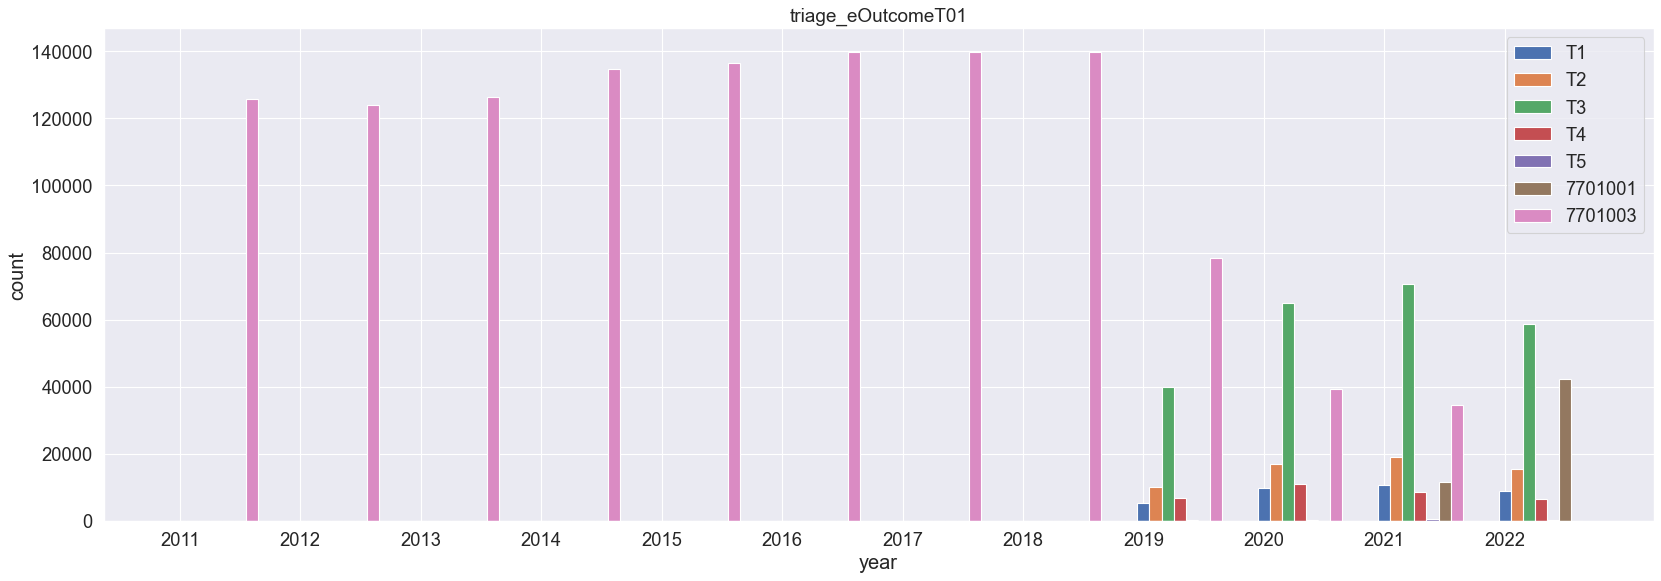

In [113]:
width=0.1

plt.figure(figsize=(25, 8), dpi=80)

x1 = [int(year) for year in years]
y1 = transposed1[0]

x2 = [p + width for p in x1]
y2 = transposed1[1]

x3 = [p+ 2*width for p in x1]
y3 = transposed1[2]

x4 = [p + 3*width for p in x1]
y4 = transposed1[3]

x5 = [p + 4*width for p in x1]
y5 = transposed1[4]

x6 = [p+ 5*width for p in x1]
y6 = transposed1[5]

x7 = [p + 6*width for p in x1]
y7 = transposed1[6]

plt.ylabel("count")          # 設定y軸標題 
plt.xlabel("year")            # 設定x軸標題
plt.xticks([int(year) for year in years]) 
plt.title("triage_eOutcomeT01", {'fontsize' : 17})  # 設定標題、文字大小
#plt.ylim(0, 140000) 

plt.bar(x1, y1, label='T1',width=0.1)  #繪製長條圖
plt.bar(x2, y2, label='T2',width=0.1)  #繪製長條圖
plt.bar(x3, y3, label='T3',width=0.1)  #繪製長條圖
plt.bar(x4, y4, label='T4',width=0.1)  #繪製長條圖
plt.bar(x5, y5, label='T5',width=0.1)  #繪製長條圖
plt.bar(x6, y6, label='7701001',width=0.1)  #繪製長條圖
plt.bar(x7, y7, label='7701003',width=0.1)  #繪製長條圖

plt.legend()

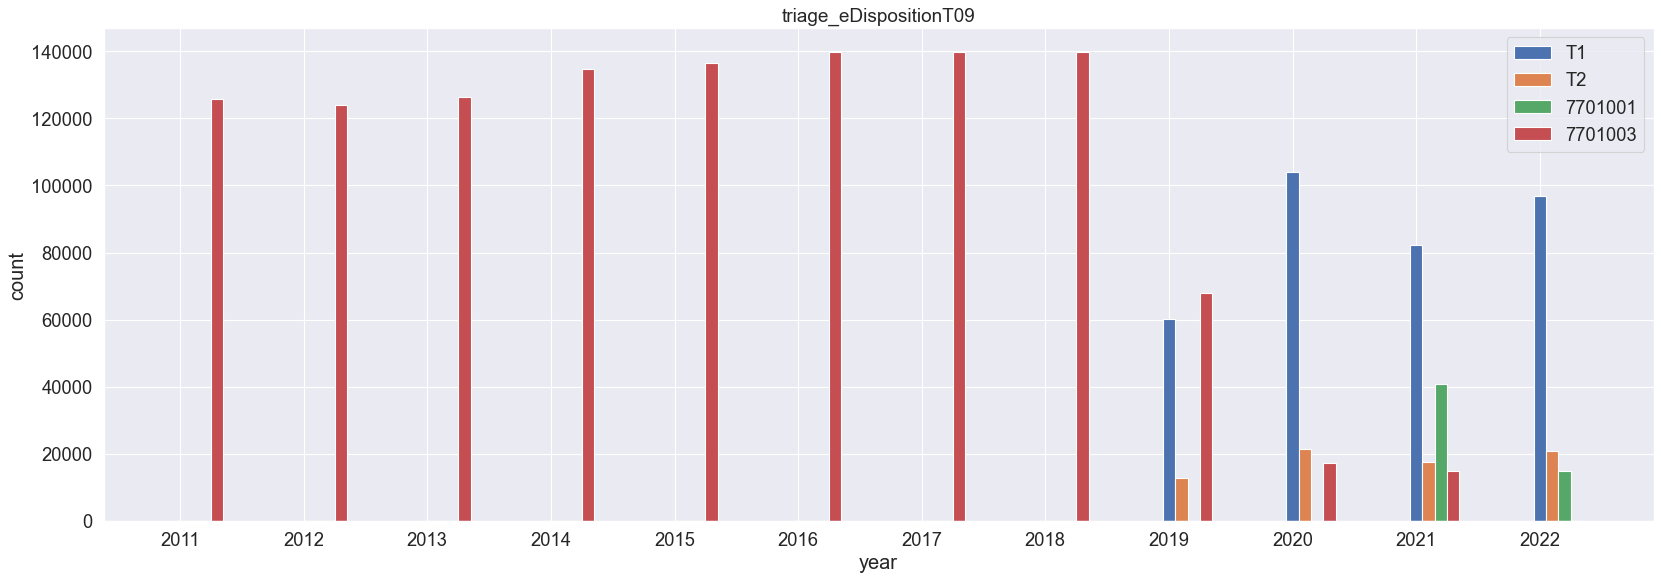

In [114]:
width=0.1

plt.figure(figsize=(25, 8), dpi=80)

x1 = [int(year) for year in years]
y1 = transposed2[0]

x2 = [p + width for p in x1]
y2 = transposed2[1]

x3 = [p+ 2*width for p in x1]
y3 = transposed2[2]

x4 = [p + 3*width for p in x1]
y4 = transposed2[3]

plt.ylabel("count")          # 設定y軸標題 
plt.xlabel("year")            # 設定x軸標題
plt.xticks([int(year) for year in years]) 
plt.title("triage_eDispositionT09", {'fontsize' : 17})  # 設定標題、文字大小
#plt.ylim(0, 140000) 

plt.bar(x1, y1, label='T1',width=0.1)  #繪製長條圖
plt.bar(x2, y2, label='T2',width=0.1)  #繪製長條圖
plt.bar(x3, y3, label='7701001',width=0.1)  #繪製長條圖
plt.bar(x4, y4, label='7701003',width=0.1)  #繪製長條圖
plt.legend()